In [1]:
import yfinance as yf
import pandas as pd

pd.set_option('display.max_columns', 30)

# Defina o símbolo da ação que você deseja obter, lembrar de colocar .SA
acoes = ['PETR4.SA']

# Obtenha os dados históricos das ações usando o Yahoo Finance
df = yf.download(acoes, start="2021-01-01", end="2024-02-10")

df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,28.650000,29.18,28.530001,28.910000,11.359622,74719700
2021-01-05,28.900000,30.18,28.240000,30.040001,11.803635,95181100
2021-01-06,30.160000,30.90,30.049999,30.100000,11.827210,96562500
2021-01-07,30.340000,31.15,30.340000,31.000000,12.180846,56171300
2021-01-08,31.459999,31.76,30.350000,31.120001,12.227999,67136300


In [2]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-05,41.009998,41.680000,40.930000,41.209999,41.209999,27703000
2024-02-06,41.450001,42.349998,41.270000,41.590000,41.590000,35474600
2024-02-07,41.520000,42.200001,41.419998,42.200001,42.200001,30648100
2024-02-08,42.299999,42.450001,41.860001,41.860001,41.860001,25589100
2024-02-09,42.139999,42.330002,41.299999,41.299999,41.299999,30388000


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,774.000000,774.000000,774.000000,774.000000,774.000000,7.740000e+02
mean,29.447713,29.903450,29.000879,29.463566,19.579371,7.140439e+07
std,4.180504,4.196962,4.176248,4.194535,8.367220,3.785464e+07
min,21.000000,21.889999,20.480000,21.100000,8.290834,1.381830e+07
25%,26.272501,26.792500,25.910000,26.375000,11.938395,4.818122e+07
50%,29.010000,29.299999,28.605000,29.085000,17.941278,6.360380e+07
75%,32.425000,32.897501,31.900000,32.427500,23.890231,8.580782e+07
max,42.299999,42.450001,41.860001,42.200001,42.200001,4.902304e+08


In [4]:
df_corr = df.corr()
df_corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.996078,0.995421,0.990221,0.700011,-0.208828
High,0.996078,1.000000,0.995191,0.995545,0.699376,-0.181191
Low,0.995421,0.995191,1.000000,0.996198,0.708608,-0.245246
Close,0.990221,0.995545,0.996198,1.000000,0.706916,-0.216523
Adj Close,0.700011,0.699376,0.708608,0.706916,1.000000,-0.296956
Volume,-0.208828,-0.181191,-0.245246,-0.216523,-0.296956,1.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

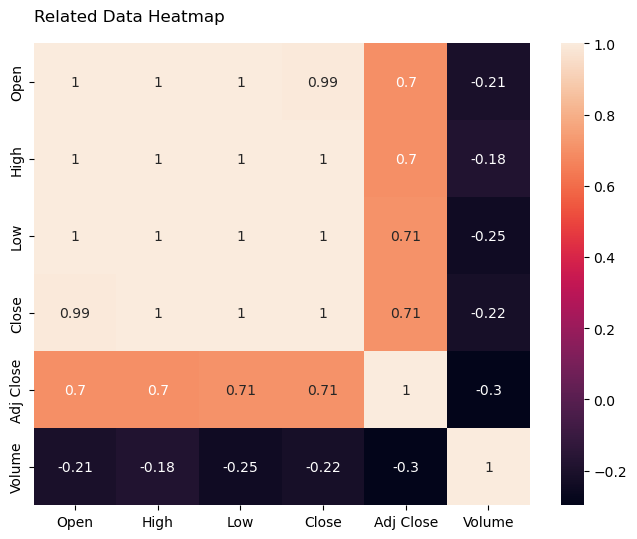

In [6]:
plt.figure(figsize= (8, 6))
sns.heatmap(data = df_corr, annot= True, cmap= 'rocket')
plt.title('Related Data Heatmap', loc = 'left', y = 1.03)
plt.show()

In [7]:
import numpy as np

df['subiu'] = np.where(df['Close'] > df['Open'], 1, 0)

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,subiu
Date,,,,,,,
2021-01-04,28.650000,29.180000,28.530001,28.910000,11.359622,74719700,1
2021-01-05,28.900000,30.180000,28.240000,30.040001,11.803635,95181100,1
2021-01-06,30.160000,30.900000,30.049999,30.100000,11.827210,96562500,0
2021-01-07,30.340000,31.150000,30.340000,31.000000,12.180846,56171300,1
2021-01-08,31.459999,31.760000,30.350000,31.120001,12.227999,67136300,0
...,...,...,...,...,...,...,...
2024-02-05,41.009998,41.680000,40.930000,41.209999,41.209999,27703000,1
2024-02-06,41.450001,42.349998,41.270000,41.590000,41.590000,35474600,1
2024-02-07,41.520000,42.200001,41.419998,42.200001,42.200001,30648100,1


In [9]:
media_close_mes = df['Close'].resample('M').mean()
media_close_mes

Date
2021-01-31    28.833684
2021-02-28    26.917222
2021-03-31    22.916957
2021-04-30    23.755500
2021-05-31    25.384762
2021-06-30    28.745238
2021-07-31    27.516190
2021-08-31    27.698636
2021-09-30    26.184762
2021-10-31    28.699500
2021-11-30    27.267000
2021-12-31    28.914286
2022-01-31    30.791905
2022-02-28    32.934737
2022-03-31    32.320909
2022-04-30    31.992105
2022-05-31    32.620000
2022-06-30    28.728095
2022-07-31    29.335238
2022-08-31    33.806956
2022-09-30    31.149524
2022-10-31    33.502000
2022-11-30    26.469500
2022-12-31    24.184286
2023-01-31    24.921818
2023-02-28    26.013889
2023-03-31    24.078696
2023-04-30    25.755556
2023-05-31    25.359091
2023-06-30    29.759524
2023-07-31    29.730000
2023-08-31    31.204783
2023-09-30    33.732000
2023-10-31    35.515714
2023-11-30    35.475000
2023-12-31    35.473685
2024-01-31    38.594091
2024-02-29    41.537143
Freq: M, Name: Close, dtype: float64

In [10]:
df_mes = pd.DataFrame(media_close_mes)
df_mes

,Close
Date,
2021-01-31,28.833684
2021-02-28,26.917222
2021-03-31,22.916957
2021-04-30,23.755500
2021-05-31,25.384762
2021-06-30,28.745238
2021-07-31,27.516190
2021-08-31,27.698636
2021-09-30,26.184762


In [11]:
mes_groupby = df_mes.groupby(df_mes.index.month).mean()
mes_groupby

,Close
Date,
1,30.785374
2,31.850748
3,26.438854
4,27.167720
5,27.787951
6,29.077619
7,28.860476
8,30.903458
9,30.355428


C:\Users\leand\AppData\Local\Temp\ipykernel_26028\542077196.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = mes_groupby, x = mes_groupby.index, y = mes_groupby.Close, palette='viridis', markers='o')


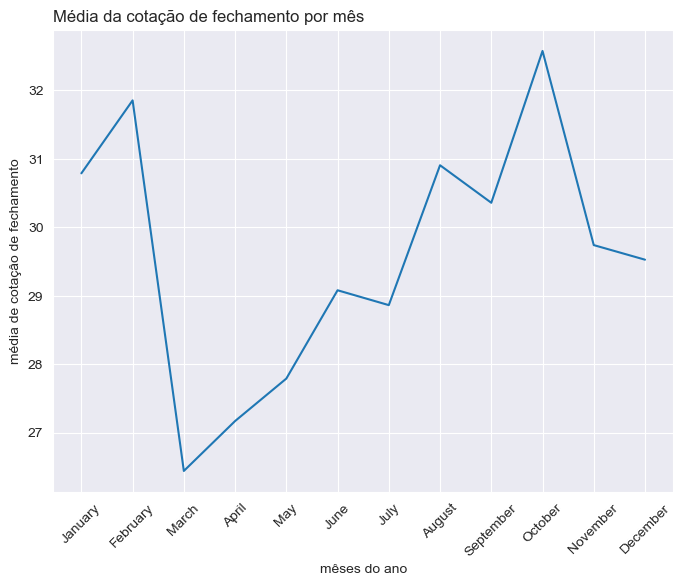

In [12]:
import calendar

plt.figure(figsize= (8,6))
sns.set_style('darkgrid')
sns.lineplot(data = mes_groupby, x = mes_groupby.index, y = mes_groupby.Close, palette='viridis', markers='o')
plt.xticks(range(1, 13), calendar.month_name[1:13], rotation=45)
plt.xlabel('mêses do ano')
plt.ylabel('média de cotaçâo de fechamento')
plt.title('Média da cotação de fechamento por mês', loc = 'left')

plt.savefig('cot_mes.png', dpi = 400, bbox_inches = 'tight')
plt.show()

In [28]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,subiu
Date,,,,,,,
2024-02-05,41.009998,41.680000,40.930000,41.209999,41.209999,27703000,1
2024-02-06,41.450001,42.349998,41.270000,41.590000,41.590000,35474600,1
2024-02-07,41.520000,42.200001,41.419998,42.200001,42.200001,30648100,1
2024-02-08,42.299999,42.450001,41.860001,41.860001,41.860001,25589100,0
2024-02-09,42.139999,42.330002,41.299999,41.299999,41.299999,30388000,0


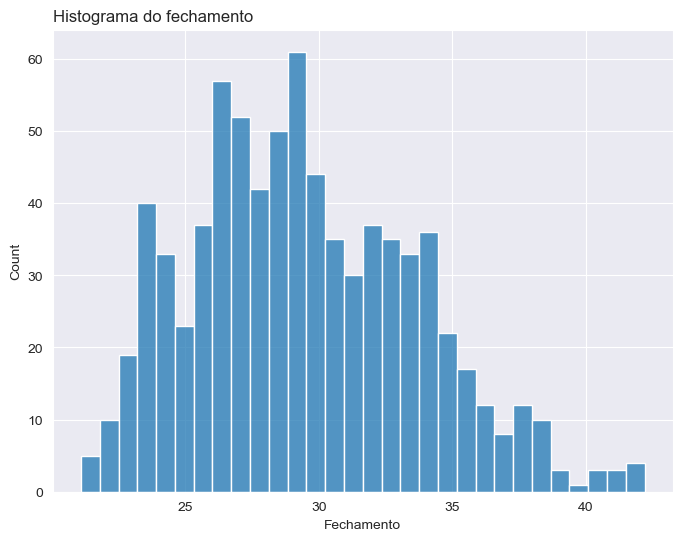

In [13]:
plt.figure(figsize= (8,6))
sns.set_style('darkgrid')
sns.histplot(data = df, x = df.Close, bins= 30)
plt.xlabel('Fechamento')
plt.title('Histograma do fechamento', loc = 'left')
plt.savefig('hist_fech.png', dpi = 400, bbox_inches = 'tight')
plt.show()

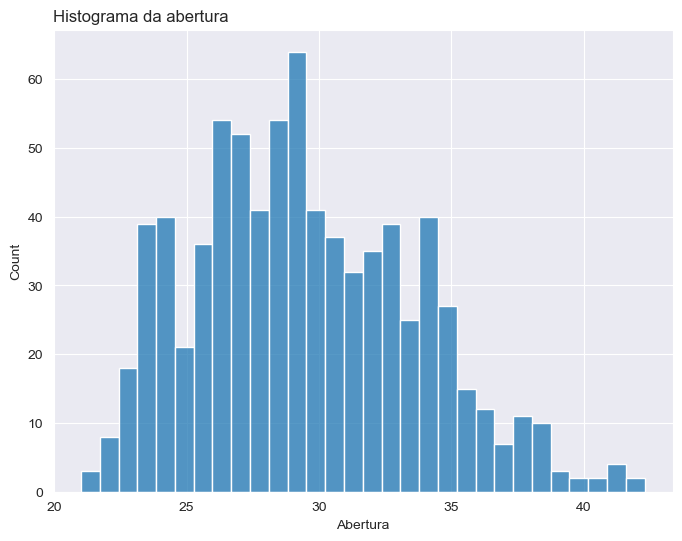

In [31]:
plt.figure(figsize= (8,6))
sns.set_style('darkgrid')
sns.histplot(data = df, x = df.Open, bins= 30)
plt.xlabel('Abertura')
plt.title('Histograma da abertura', loc = 'left')
plt.show()

In [32]:
!pip install scipy

In [33]:
import scipy.stats as stats

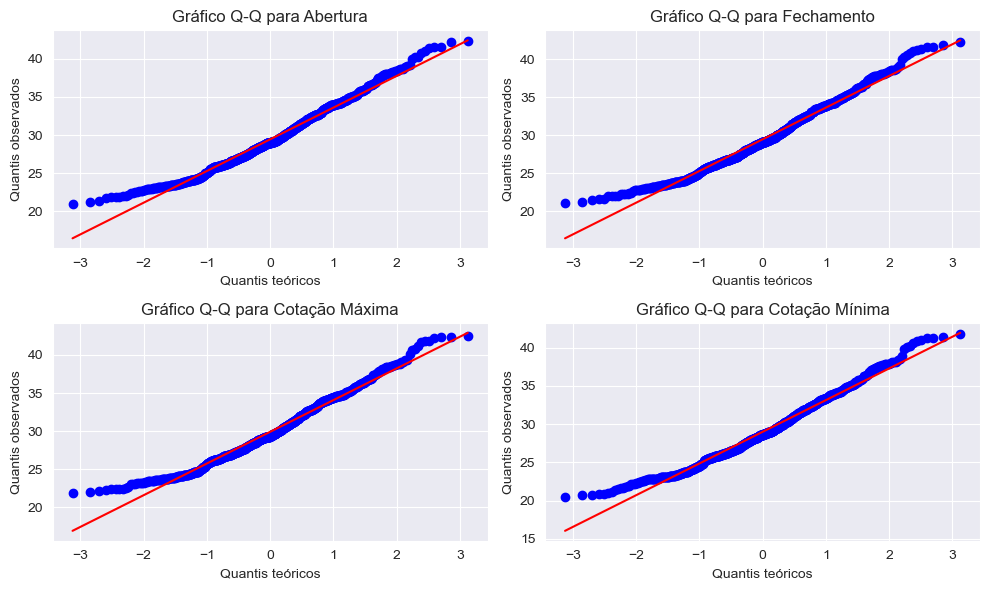

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

stats.probplot(df.Open, dist="norm", plot=ax[0, 0])
ax[0, 0].set_title('Gráfico Q-Q para Abertura')
ax[0, 0].set_xlabel('Quantis teóricos')
ax[0, 0].set_ylabel('Quantis observados')

stats.probplot(df.Close, dist="norm", plot=ax[0, 1])
ax[0, 1].set_title('Gráfico Q-Q para Fechamento')
ax[0, 1].set_xlabel('Quantis teóricos')
ax[0, 1].set_ylabel('Quantis observados')

stats.probplot(df.High, dist="norm", plot=ax[1, 0])
ax[1, 0].set_title('Gráfico Q-Q para Cotação Máxima')
ax[1, 0].set_xlabel('Quantis teóricos')
ax[1, 0].set_ylabel('Quantis observados')

stats.probplot(df.Low, dist="norm", plot=ax[1, 1])
ax[1, 1].set_title('Gráfico Q-Q para Cotação Mínima')
ax[1, 1].set_xlabel('Quantis teóricos')
ax[1, 1].set_ylabel('Quantis observados')

plt.tight_layout()
#plt.savefig('Distribuicao_acoes.png', dpi = 400, bbox_inches = 'tight')
plt.show()